In [1]:
from sklearn import datasets
X,y = datasets.make_classification(n_samples = 1000, n_features=3, n_redundant=0)

In [2]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
preds = dt.predict(X)
(y == preds).mean()

1.0

Text(0.5,0,'Max Depth')

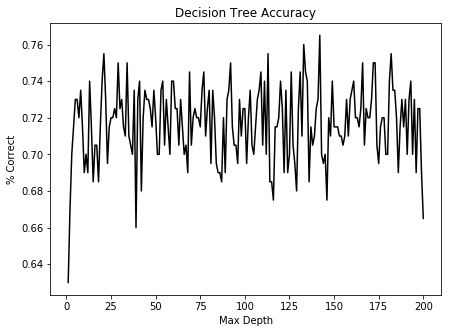

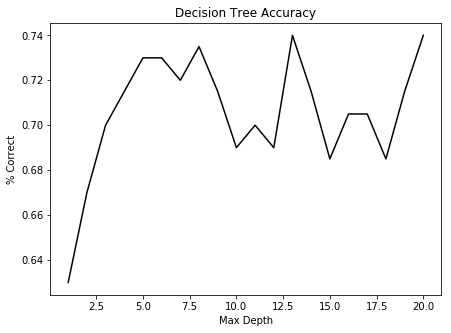

In [12]:
n_features=200
X, y = datasets.make_classification(750, n_features, n_informative=5)
import numpy as np
training = np.random.choice([True, False], p=[.75, .25], size=len(y))
accuracies = []
for x in np.arange(1, n_features+1):
    dt = DecisionTreeClassifier(max_depth=x)
    dt.fit(X[training], y[training])
    preds = dt.predict(X[~training])
    accuracies.append((preds == y[~training]).mean())
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, n_features+1), accuracies, color='k')
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Correct")
ax.set_xlabel("Max Depth")
f, bx = plt.subplots(figsize=(7, 5))
bx.plot(range(1, n_features+1)[:20], accuracies[:20], color='k')
bx.set_title("Decision Tree Accuracy")
bx.set_ylabel("% Correct")
bx.set_xlabel("Max Depth")

<Container object of 44 artists>

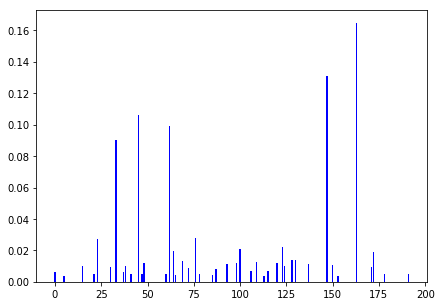

In [14]:
dt_ci = DecisionTreeClassifier()
dt.fit(X, y)
ne0 = dt.feature_importances_ != 0
y_comp = dt.feature_importances_[ne0]
x_comp = np.arange(len(dt.feature_importances_))[ne0]
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(x_comp, y_comp, color='blue')

In [15]:
from sklearn import datasets
X,y = X, y = datasets.make_classification(1000, 20, n_informative=3)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

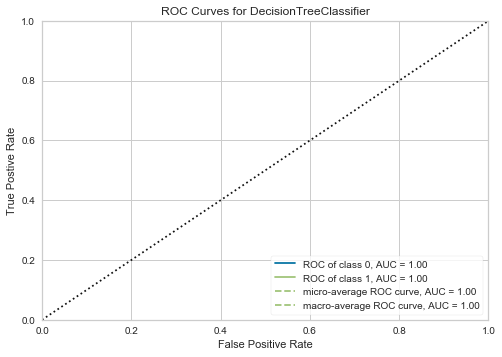

In [29]:
from yellowbrick.classifier import ROCAUC
model = DecisionTreeClassifier()
model.fit(X,y)
visualizer = ROCAUC(model)
visualizer.score(X,y)
visualizer.poof()


In [1]:
from sklearn import datasets
X, y = datasets.make_classification(1000, 20, n_informative=3)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [2]:
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
str_buffer = StringIO()
tree.export_graphviz(dt, out_file=str_buffer)
graph = pydotplus.graph_from_dot_data(str_buffer.getvalue())
graph.write_png('shujudata.png') 

True

In [3]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:

str_buffer = StringIO()
tree.export_graphviz(dt, out_file=str_buffer)
graph = pydotplus.graph_from_dot_data(str_buffer.getvalue())
graph.write_png('shujudata01.png') 

True

In [14]:
def plot_dt(model, filename):
    str_buffer = StringIO()
    tree.export_graphviz(dt, out_file=str_buffer)
    graph = pydotplus.graph_from_dot_data(str_buffer.getvalue())
    graph.write_png('{}'.format(filename)) 

In [15]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(X, y)
plot_dt(dt, "entropy.png")

In [16]:
dt = DecisionTreeClassifier(min_samples_leaf=10,criterion='entropy',max_depth=5).fit(X, y)
plot_dt(dt, 'entropy01.png')

In [19]:
from sklearn import datasets
X, y = datasets.make_classification(1000)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
print("Accuracy:\t", (y == rf.predict(X)).mean())

Accuracy:	 0.991


In [23]:
print('Total Correct:\t', (y == rf.predict(X)).sum())

Total Correct:	 991


In [24]:
rf.criterion

'gini'

In [25]:
rf.bootstrap 

True

In [26]:
rf.n_jobs

1

In [27]:
rf.max_features 

'auto'

In [31]:
probs = rf.predict_proba(X)
probs

array([[1. , 0. ],
       [0.9, 0.1],
       [0. , 1. ],
       ...,
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ]])

In [32]:
import pandas as pd
probs_df = pd.DataFrame(probs, columns=['0', '1'])
probs_df['was_correct'] = rf.predict(X) == y


In [33]:
probs_df

,0,1,was_correct
0,1.0,0.0,True
1,0.9,0.1,True
2,0.0,1.0,True
3,0.0,1.0,True
4,1.0,0.0,True
5,0.0,1.0,True
6,0.0,1.0,True
7,1.0,0.0,True
8,0.1,0.9,True
9,0.0,1.0,True


Text(0.5,0,'% trees for 0')

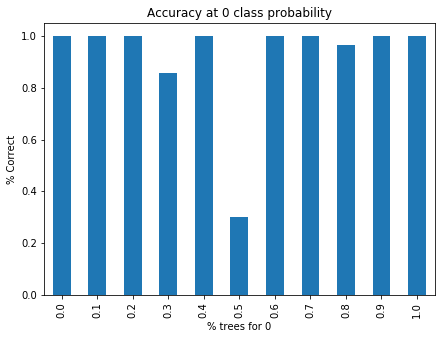

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
probs_df.groupby('0').was_correct.mean().plot(kind='bar', ax=ax)
ax.set_title("Accuracy at 0 class probability")
ax.set_ylabel("% Correct")
ax.set_xlabel("% trees for 0")

In [37]:
probs_df.groupby('0').was_correct.mean()


0
0.0    1.000000
0.1    1.000000
0.2    1.000000
0.3    0.857143
0.4    1.000000
0.5    0.300000
0.6    1.000000
0.7    1.000000
0.8    0.966667
0.9    1.000000
1.0    1.000000
Name: was_correct, dtype: float64

In [41]:
probs_df.groupby('0').sum()

,1,was_correct
0,,
0.0,329.0,329.0
0.1,98.1,109.0
0.2,36.0,45.0
0.3,4.9,6.0
0.4,1.2,2.0
0.5,5.0,3.0
0.6,3.2,8.0
0.7,3.0,10.0
0.8,6.0,29.0


In [42]:
probs_df.groupby('0').was_correct.sum()

0
0.0    329.0
0.1    109.0
0.2     45.0
0.3      6.0
0.4      2.0
0.5      3.0
0.6      8.0
0.7     10.0
0.8     29.0
0.9     90.0
1.0    360.0
Name: was_correct, dtype: float64

Text(0.5,1,'Feature Importances')

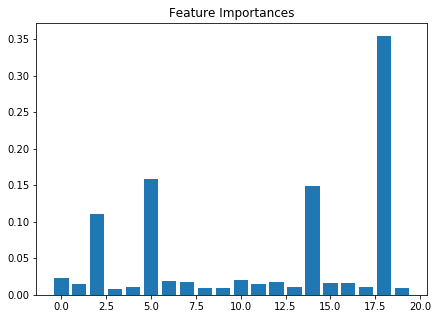

In [44]:
rf = RandomForestClassifier()
rf.fit(X, y)
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(rf.feature_importances_ )), rf.feature_importances_ )
ax.set_title("Feature Importances")

In [45]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000,n_features=20,n_informative=15,flip_y=.5, weights=[.2,.8])

In [48]:
import numpy as np
training_data = np.random.choice([True, False], p=[0.8,0.2], size = y.shape)


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X[training_data],y[training_data])
preds = rf.predict(X[~training_data])
print('Accuracy:\t',rf.score(X[~training_data], y[~training_data]))
print('Accuracy:\t', (preds == y[~training_data]).mean())

Accuracy:	 0.6594784353059178
Accuracy:	 0.6594784353059178


In [90]:
from sklearn.metrics import confusion_matrix
max_feature_params = ['auto', 'sqrt', 'log2', .01, .5, .99]
confusion_matrixes = {}
for max_feature in max_feature_params:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X[training_data], y[training_data])
    confusion_matrixes[max_feature] = confusion_matrix(y[~training_data],rf.predict(X[~training_data])).ravel()


In [91]:
import pandas as pd
confusion_df = pd.DataFrame(confusion_matrixes)


In [92]:
confusion_df

,auto,sqrt,log2,0.01,0.5,0.99
0,298,303,295,277,306,324
1,424,419,427,445,416,398
2,263,247,276,271,316,274
3,1009,1025,996,1001,956,998


Text(0,0.5,'Correct')

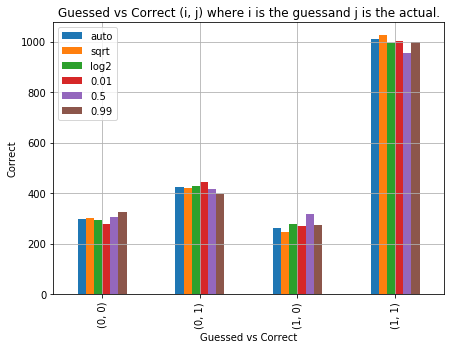

In [97]:
import itertools
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(7,5))
confusion_df.plot(kind='bar', ax=ax)
ax.legend(loc='best')
ax.set_title("Guessed vs Correct (i, j) where i is the guessand j is the actual.")
ax.grid()
ax.set_xticklabels([str((i, j)) for i, j in list(itertools.product(range(2), range(2)))])
ax.set_xlabel("Guessed vs Correct")
ax.set_ylabel("Correct")

In [122]:
n_estimator_params = range(1, 20)
confusion_matrixes = {}
for n_estimator in n_estimator_params:
    rf = RandomForestClassifier(n_estimators=n_estimator)
    rf.fit(X[training_data], y[training_data])
    confusion_matrixes[n_estimator] = confusion_matrix(y[~training_data],rf.predict(X[~training_data]))
    accuracy = lambda x: np.trace(x) / np.sum(x, dtype=float)
    confusion_matrixes[n_estimator] = accuracy(confusion_matrixes[n_estimator])
    accuracy_series = pd.Series(confusion_matrixes)

In [123]:
accuracy_series

1     0.594283
2     0.560181
3     0.615346
4     0.594784
5     0.623872
6     0.621364
7     0.659478
8     0.642427
9     0.669007
10    0.651454
11    0.681545
12    0.680040
13    0.683049
14    0.673521
15    0.685557
16    0.677031
17    0.677031
18    0.685055
19    0.696590
dtype: float64

Text(0.5,0,'Number of Estimators')

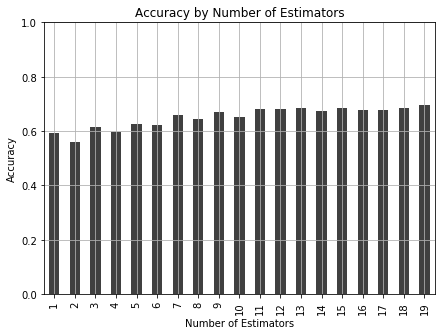

In [124]:
import itertools
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
accuracy_series.plot(kind='bar', ax=ax, color='k', alpha=.75)
ax.grid()
ax.set_title("Accuracy by Number of Estimators")
ax.set_ylim(0, 1)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Estimators")

In [125]:
rf = RandomForestClassifier(n_jobs=4, verbose=True)
rf.fit(X, y)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [126]:
rf.predict(X)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([0, 0, 1, ..., 0, 1, 1])

In [3]:
from sklearn import datasets
X, y = datasets.make_classification()
from sklearn.svm import SVC
svm = SVC()
svm.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
X, y = datasets.make_blobs(n_features=2, centers=2)
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Text(0.5,1,'A well separated dataset')

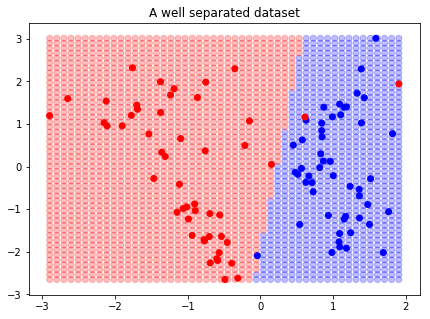

In [22]:
%matplotlib inline
import numpy as np
X, y = datasets.make_classification(n_features=2,n_classes=2,n_informative=2,n_redundant=0)
svm.fit(X, y)
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax),np.linspace(ymin, ymax))])
test_preds = svm.predict(test_points)
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
colors = np.array(['r', 'b'])
ax.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=.25)
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title("A well separated dataset")

Text(0.5,1,'A well separated dataset')

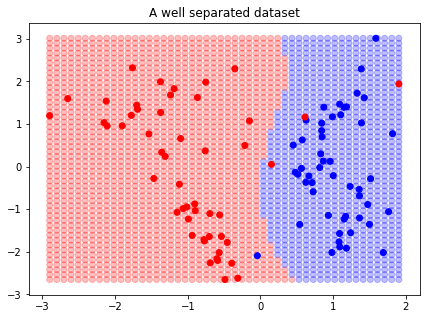

In [29]:
radial_svm = SVC(kernel='rbf')
radial_svm.fit(X, y)
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax),np.linspace(ymin, ymax))])
test_preds = radial_svm.predict(test_points)
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
colors = np.array(['r', 'b'])
ax.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=.25)
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title("A well separated dataset")

In [31]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000, n_classes=3, n_informative=3)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.predict(X)


array([0, 1, 1, ..., 2, 2, 1])

In [38]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
mlr = OneVsRestClassifier(LogisticRegression(), n_jobs=2)
mlr.fit(X,y)
mlr.predict(X)
#mlr.score(X,y)

array([0, 1, 1, ..., 1, 1, 0])

In [43]:
import numpy as np
def train_one_vs_rest(y, class_label):
    y_train = (y == class_label).astype(int)
    return y_train
classifiers = []
for class_i in sorted(np.unique(y)):
    l = LogisticRegression()
    y_train = train_one_vs_rest(y, class_i)
    l.fit(X, y_train)
    classifiers.append(l)

for classifier in classifiers:
    print(classifier.predict_proba(X))


[[0.05372333 0.94627667]
 [0.97006582 0.02993418]
 [0.79749873 0.20250127]
 ...
 [0.96768444 0.03231556]
 [0.99090668 0.00909332]
 [0.15479196 0.84520804]]
[[0.85250828 0.14749172]
 [0.17880837 0.82119163]
 [0.08572838 0.91427162]
 ...
 [0.42090766 0.57909234]
 [0.2332292  0.7667708 ]
 [0.34718494 0.65281506]]
[[9.97759431e-01 2.24056872e-03]
 [9.47448069e-01 5.25519305e-02]
 [9.94981629e-01 5.01837117e-03]
 ...
 [5.02759916e-01 4.97240084e-01]
 [4.46645089e-01 5.53354911e-01]
 [9.99483096e-01 5.16904174e-04]]


In [45]:
y_train.shape

(10000,)

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification()

In [4]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier()
sgd.fit(X,y)

D:\Users\13884\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['sci.crypt', 'sci.med']
newgroup = fetch_20newsgroups(categories = categories)

In [11]:
print("\n".join(newgroup.data[:1]))

From: steve-b@access.digex.com (Steve Brinich)
Subject: Re: Fighting the Clipper Initiative
Organization: Express Access Online Communications, Greenbelt, MD USA
Lines: 24
NNTP-Posting-Host: access.digex.net

> > >As a flaming libertarian paranoid extremist (:-), I'at a loss for
> > >specific objections that don't sound frighteningly technical.
> >
> >  The idea that foisting the Cripple Chip standard on US manufacturers would
> >result in saying "Sayonara" to yet another high-tech market isn't technical,
> >isn't in the least difficult to understand, and plays on a concern lots of
> >people are worried about already....     
>
>  Could you expand on this...?


  Simple -- if you have a choice between:

 1. American manufacturers peddling Cripple Chips with a secret untested
     algorithm whose keys are held by people with a history of untrustworthy
     behavoir, or

 2. Japanese (to pick the obvious example) manufacturers peddling encryption
     chips with an algorithm that has fac

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
bow = count_vec.fit_transform(newgroup.data)

In [15]:
bow

<1189x26125 sparse matrix of type '<class 'numpy.int64'>'
	with 215503 stored elements in Compressed Sparse Row format>

In [16]:
import numpy as np
bow = np.array(bow.todense())

In [18]:
bow.shape

(1189, 26125)

In [19]:
words = np.array(count_vec.get_feature_names())

In [24]:
words[bow[0]>0]

array(['24', 'about', 'access', 'algorithm', 'already', 'american', 'an',
       'and', 'another', 'any', 'are', 'as', 'at', 'behavoir', 'between',
       'brinich', 'by', 'can', 'chip', 'chips', 'choice', 'choose',
       'citizens', 'clipper', 'com', 'communications', 'concern',
       'control', 'could', 'cripple', 'deny', 'difficult', 'digex', 'do',
       'don', 'drugs', 'encryption', 'example', 'expand', 'express',
       'extremist', 'faced', 'fighting', 'flaming', 'foisting', 'for',
       'frighteningly', 'from', 'global', 'glorious', 'government',
       'greenbelt', 'has', 'have', 'held', 'high', 'history', 'host',
       'idea', 'if', 'in', 'initiative', 'is', 'isn', 'it', 'japanese',
       'keys', 'least', 'libertarian', 'lines', 'loss', 'lots',
       'manufacturers', 'market', 'md', 'most', 'much', 'net', 'nntp',
       'not', 'objections', 'obvious', 'of', 'on', 'online', 'or',
       'organization', 'paranoid', 'peddling', 'people', 'pick', 'plays',
       'posting', 

In [26]:
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()

In [29]:
mask = np.random.choice([True, False], p=[0.7,0.3], size=len(bow))
clf.fit(bow[mask], newgroup.target[mask])
predictions = clf.predict(bow[~mask])

In [31]:
np.mean(predictions == newgroup.target[~mask])


0.9794721407624634

In [33]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'misc.forsale', 'rec.motorcycles']
newgroups = fetch_20newsgroups(categories=categories)

In [34]:
print("\n".join(newgroup.data[:1]))

From: steve-b@access.digex.com (Steve Brinich)
Subject: Re: Fighting the Clipper Initiative
Organization: Express Access Online Communications, Greenbelt, MD USA
Lines: 24
NNTP-Posting-Host: access.digex.net

> > >As a flaming libertarian paranoid extremist (:-), I'at a loss for
> > >specific objections that don't sound frighteningly technical.
> >
> >  The idea that foisting the Cripple Chip standard on US manufacturers would
> >result in saying "Sayonara" to yet another high-tech market isn't technical,
> >isn't in the least difficult to understand, and plays on a concern lots of
> >people are worried about already....     
>
>  Could you expand on this...?


  Simple -- if you have a choice between:

 1. American manufacturers peddling Cripple Chips with a secret untested
     algorithm whose keys are held by people with a history of untrustworthy
     behavoir, or

 2. Japanese (to pick the obvious example) manufacturers peddling encryption
     chips with an algorithm that has fac

In [36]:
mn_bow= count_vec.fit_transform(newgroups.data)


In [37]:
mn_bow = np.array(mn_bow.todense())

In [38]:
mn_words = np.array(count_vec.get_feature_names())

In [41]:
mn_words[mn_bow[0]>0]

array(['13', '522', '6130328', '675197', '82', '90', 'also', 'ama', 'and',
       'article', 'ask', 'atlanta', 'att', 'backstreet', 'be', 'bessette',
       'bianchi', 'bicycles', 'bmws', 'breeder', 'cam', 'cats', 'cb',
       'cbnewsj', 'chain', 'chains', 'chase', 'com', 'dod', 'dog', 'dogs',
       'emory', 'farm', 'frequency', 'from', 'ga', 'gnome', 'gs850gl',
       'heard', 'high', 'host', 'hp', 'hplsla', 'in', 'irony', 'is', 'it',
       'james', 'jimbes', 'ken', 'kens', 'laughing', 'life', 'lines',
       'loved', 'mike', 'mitten', 'motorcycles', 'newsreader', 'nntp',
       'noel', 'not', 'of', 'org', 'organization', 'pd', 'pl6', 'posting',
       'produced', 'ps', 're', 'revolution', 'snyder', 'software',
       'spice', 'squeaks', 'subject', 'suzuki', 'televised', 'that',
       'the', 'they', 'tin', 'to', 'usa', 'version', 'what', 'why',
       'will', 'with', 'writes', 'wrote'], dtype='<U80')

In [45]:
mask = np.random.choice([True, False], p=[0.8,0.2], size=len(mn_bow.data))
multinom = naive_bayes.MultinomialNB()
multinom.fit(mn_bow[mask], newgroups.target[mask])
predictions = multinom.predict(mn_bow[~mask])

In [46]:
np.mean(predictions==newgroups.target[~mask])

0.961764705882353

In [48]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target

In [49]:
X = iris.data.copy()
y = iris.target.copy()
names = iris.target_names.copy()
names = np.append(names, ['unlabeled'])
names

array(['setosa', 'versicolor', 'virginica', 'unlabeled'], dtype='<U10')

In [50]:
y[np.random.choice([True, False], len(y))] = -1

In [53]:
names[y[:10]]

array(['setosa', 'unlabeled', 'unlabeled', 'setosa', 'unlabeled',
       'setosa', 'setosa', 'setosa', 'unlabeled', 'setosa'], dtype='<U10')

In [54]:
from sklearn import semi_supervised
lp = semi_supervised.LabelPropagation()
lp.fit(X, y)


LabelPropagation(alpha=None, gamma=20, kernel='rbf', max_iter=1000, n_jobs=1,
         n_neighbors=7, tol=0.001)

In [56]:
preds = lp.predict(X)
(preds == iris.target).mean()

0.98

In [57]:
ls = semi_supervised.LabelSpreading()
ls.fit(X, y)
(ls.predict(X) == iris.target).mean()

D:\Users\13884\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


0.9666666666666667